In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix, ConfusionMatrixDisplay

In [2]:
fruits=pd.read_csv("E:/Python Programs/fruits.csv")
fruits.head()

,color,sphericity,weight,label
0,Orange,0.947,120,Orange
1,Orange,0.917,125,Orange
2,Orange,0.923,110,Orange
3,Orange,0.916,123,Orange
4,Orange,0.943,124,Orange


In [3]:
X = fruits[["sphericity", "weight"]]
y = fruits["label"]

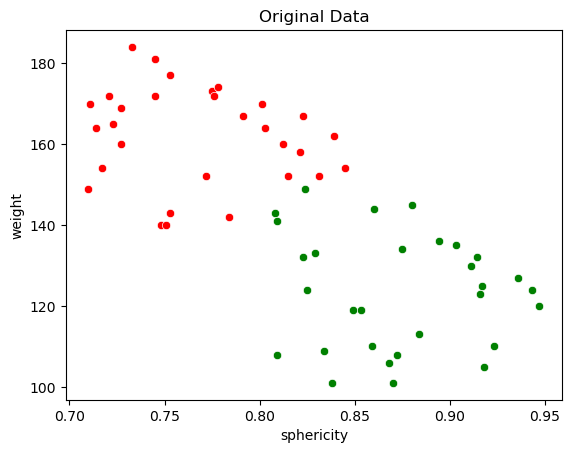

In [4]:
sns.scatterplot(data=X[y=="Apple"], x="sphericity", y="weight", c="red")
sns.scatterplot(data=X[y=="Orange"], x="sphericity", y="weight", c="green")
plt.title("Original Data")
plt.xlabel("sphericity")
plt.ylabel("weight")
plt.show()

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=10)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((45, 2), (15, 2), (45,), (15,))

In [6]:
X_train.index, y_train.index

(Index([ 6, 45, 57, 47, 10, 44, 50, 18,  4,  1, 12, 30, 22, 54, 32, 53, 19, 34,
         5, 13, 14, 41, 51, 33, 24, 11, 43, 16, 58, 40, 42, 56, 59,  8, 55, 52,
        48, 29, 25, 28, 49,  0, 15, 36,  9],
       dtype='int64'),
 Index([ 6, 45, 57, 47, 10, 44, 50, 18,  4,  1, 12, 30, 22, 54, 32, 53, 19, 34,
         5, 13, 14, 41, 51, 33, 24, 11, 43, 16, 58, 40, 42, 56, 59,  8, 55, 52,
        48, 29, 25, 28, 49,  0, 15, 36,  9],
       dtype='int64'))

In [7]:
X_test.index, y_test.index

(Index([31, 3, 38, 27, 21, 17, 46, 2, 23, 26, 35, 39, 20, 37, 7], dtype='int64'),
 Index([31, 3, 38, 27, 21, 17, 46, 2, 23, 26, 35, 39, 20, 37, 7], dtype='int64'))

In [8]:
X_train.value_counts()

sphericity  weight
0.710       149       1
0.829       133       1
0.834       109       1
0.839       162       1
0.845       154       1
0.849       119       1
0.853       119       1
0.859       110       1
0.868       106       1
0.870       101       1
0.872       108       1
0.875       134       1
0.880       145       1
0.884       113       1
0.894       136       1
0.903       135       1
0.911       130       1
0.914       132       1
0.917       125       1
0.936       127       1
0.943       124       1
0.831       152       1
0.825       124       1
0.714       164       1
0.823       167       1
0.717       154       1
0.721       172       1
0.723       165       1
0.727       169       1
0.745       172       1
0.748       140       1
0.751       140       1
0.753       143       1
            177       1
0.772       152       1
0.775       173       1
0.776       172       1
0.778       174       1
0.784       142       1
0.801       170       1
0.808       143      

In [9]:
X_test.value_counts()

sphericity  weight
0.711       170       1
0.727       160       1
0.733       184       1
0.745       181       1
0.791       167       1
0.803       164       1
0.809       108       1
            141       1
0.823       132       1
0.824       149       1
0.838       101       1
0.860       144       1
0.916       123       1
0.918       105       1
0.923       110       1
Name: count, dtype: int64

In [10]:
y_train.value_counts()

label
Apple     24
Orange    21
Name: count, dtype: int64

In [11]:
y_test.value_counts()

label
Orange    9
Apple     6
Name: count, dtype: int64

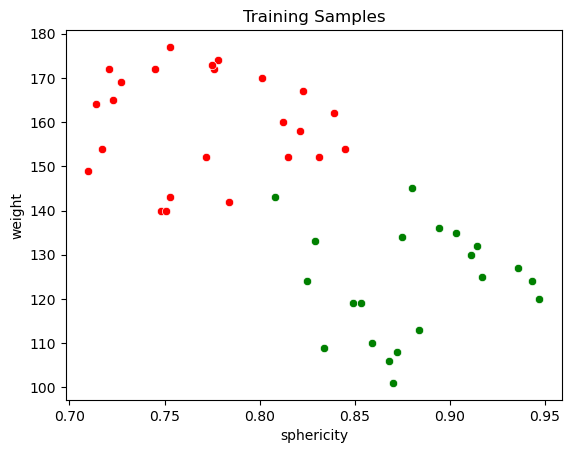

In [12]:
sns.scatterplot(data=X_train[y_train=="Apple"], x="sphericity", y="weight", c="red")
sns.scatterplot(data=X_train[y_train=="Orange"], x="sphericity", y="weight", c="green")
plt.title("Training Samples")
plt.xlabel("sphericity")
plt.ylabel("weight")
plt.show()

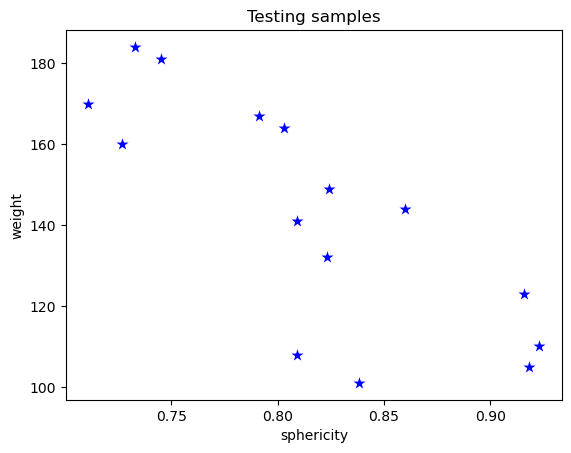

In [13]:
sns.scatterplot(data=X_test, x="sphericity", y="weight", marker='*',c='blue',s=150)
plt.title("Testing samples")
plt.xlabel("sphericity")
plt.ylabel("weight")
plt.show()

In [14]:
model=DecisionTreeClassifier(criterion="entropy")
model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

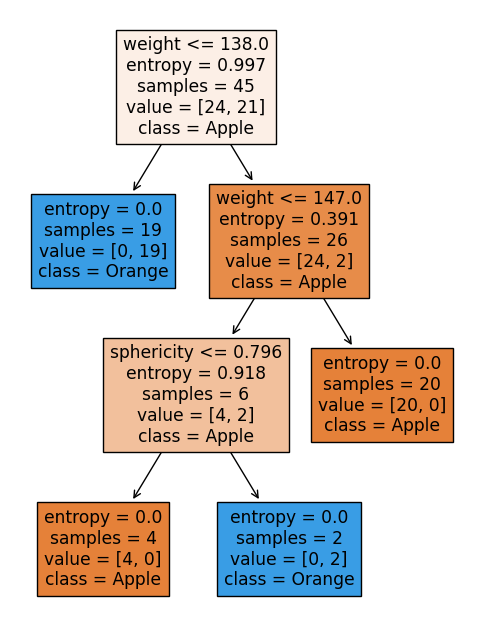

In [15]:
plt.figure(figsize=[6,8])
plot_tree(decision_tree=model, feature_names=X_train.columns, class_names=["Apple", "Orange"],filled=True)
plt.show()

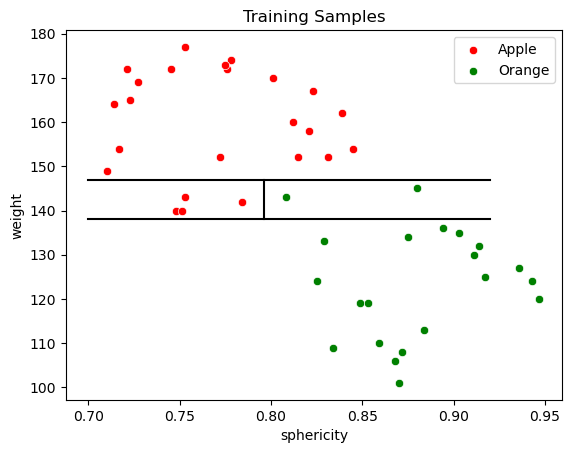

In [16]:
sns.scatterplot(data=X_train[y_train=="Apple"], x="sphericity", y="weight", c="red", label="Apple")
sns.scatterplot(data=X_train[y_train=="Orange"], x="sphericity", y="weight", c="green", label="Orange")
plt.plot([0.7,0.92],[138,138],c='black')
plt.plot([0.7,0.92],[147,147],c='black')
plt.plot([0.796,0.796],[138,147],c='black')
plt.title("Training Samples")
plt.xlabel("sphericity")
plt.ylabel("weight")
plt.legend()
plt.show()

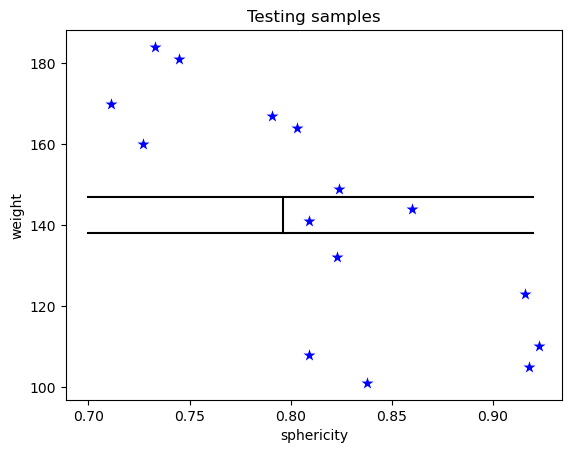

In [17]:
sns.scatterplot(data=X_test, x="sphericity", y="weight", marker='*',c='blue',s=150)
plt.plot([0.7,0.92],[138,138],c='black')
plt.plot([0.7,0.92],[147,147],c='black')
plt.plot([0.796,0.796],[138,147],c='black')
plt.title("Testing samples")
plt.xlabel("sphericity")
plt.ylabel("weight")
plt.show()

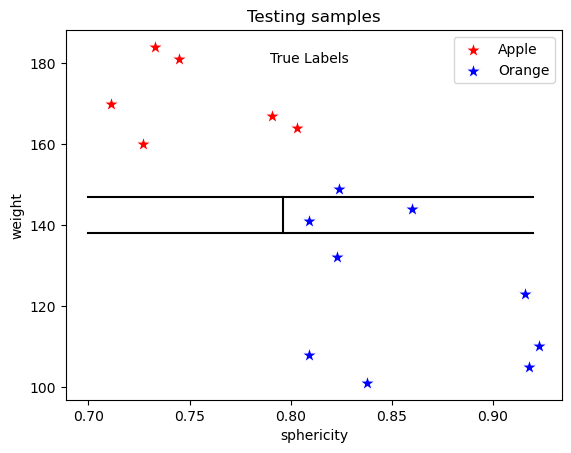

In [18]:
# Revelaing the original test results/True Values

sns.scatterplot(data=X_test[y_test=="Apple"], x="sphericity", y="weight", marker='*',c='red',s=150,label="Apple")
sns.scatterplot(data=X_test[y_test=="Orange"], x="sphericity", y="weight", marker='*',c='blue',s=150, label="Orange")
plt.plot([0.7,0.92],[138,138],c='black')
plt.plot([0.7,0.92],[147,147],c='black')
plt.plot([0.796,0.796],[138,147],c='black')
plt.title("Testing samples")
plt.xlabel("sphericity")
plt.ylabel("weight")
plt.text(0.79,180,"True Labels")
plt.legend()
plt.show()

In [19]:
y_predict=model.predict(X_test)
y_predict

array(['Apple', 'Orange', 'Apple', 'Orange', 'Apple', 'Orange', 'Apple',
       'Orange', 'Orange', 'Orange', 'Apple', 'Apple', 'Orange', 'Apple',
       'Orange'], dtype=object)

In [20]:
y_test.values

array(['Apple', 'Orange', 'Apple', 'Orange', 'Orange', 'Orange', 'Apple',
       'Orange', 'Orange', 'Orange', 'Apple', 'Apple', 'Orange', 'Apple',
       'Orange'], dtype=object)

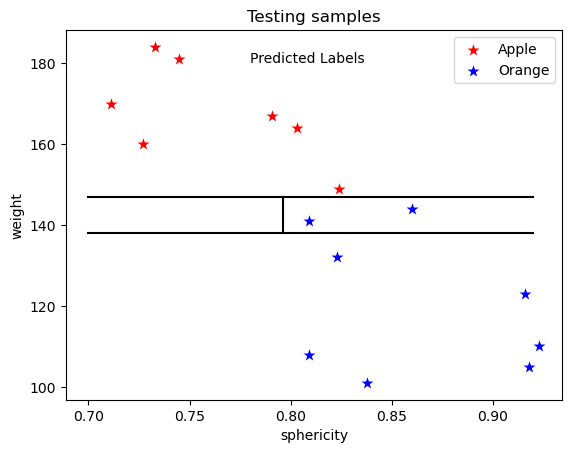

In [21]:
# Plotting the test results predicted by the machine

sns.scatterplot(data=X_test[y_predict=="Apple"], x="sphericity", y="weight", marker='*',c='red',s=150, label="Apple")
sns.scatterplot(data=X_test[y_predict=="Orange"], x="sphericity", y="weight", marker='*',c='blue',s=150,label="Orange")
plt.plot([0.7,0.92],[138,138],c='black')
plt.plot([0.7,0.92],[147,147],c='black')
plt.plot([0.796,0.796],[138,147],c='black')
plt.title("Testing samples")
plt.xlabel("sphericity")
plt.ylabel("weight")
plt.text(0.78,180,"Predicted Labels")
plt.legend()
plt.show()

In [22]:
# Therefore machine has correctly classified 14 samples correct out of 15. Hence my score will be 93%.

14/15

0.9333333333333333

In [23]:
y_predict!=y_test

31    False
3     False
38    False
27    False
21     True
17    False
46    False
2     False
23    False
26    False
35    False
39    False
20    False
37    False
7     False
Name: label, dtype: bool

In [24]:
X_test[y_predict!=y_test]

,sphericity,weight
21,0.824,149


In [25]:
accuracy_score(y_test, y_predict)

0.9333333333333333

In [26]:
confusion_matrix(y_test,y_predict)

array([[6, 0],
       [1, 8]], dtype=int64)

In [27]:
pd.DataFrame(confusion_matrix(y_test,y_predict),index=["Apple", "Orange"], columns=["Apple", "Orange"])

,Apple,Orange
Apple,6,0
Orange,1,8


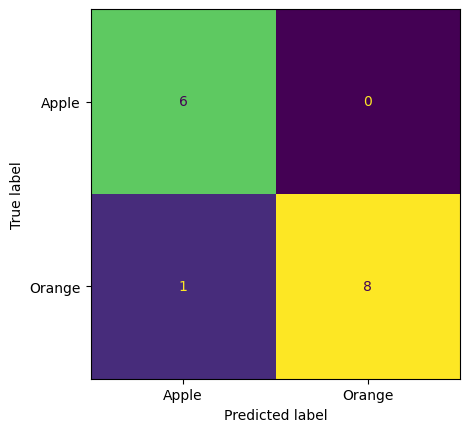

In [28]:
cm_disp = ConfusionMatrixDisplay(confusion_matrix(y_test,y_predict), display_labels=["Apple", "Orange"])
cm_disp.plot(colorbar=False)
plt.show()

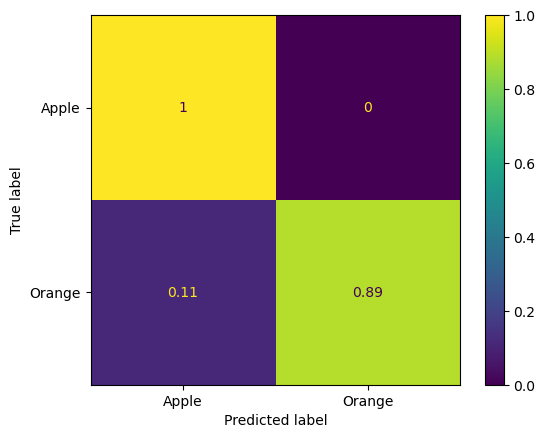

In [29]:
ConfusionMatrixDisplay.from_predictions(y_test,y_predict,normalize="true")
plt.show()

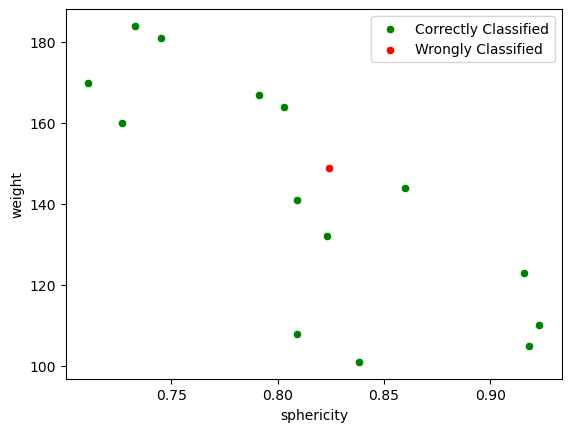

In [30]:
sns.scatterplot(data=X_test[y_predict==y_test], x="sphericity", y="weight", c='green', label="Correctly Classified")
sns.scatterplot(data=X_test[y_predict!=y_test], x="sphericity", y="weight", c='red', label="Wrongly Classified")
plt.xlabel("sphericity")
plt.ylabel("weight")
plt.legend()
plt.show()

C:\Users\skong\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\skong\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


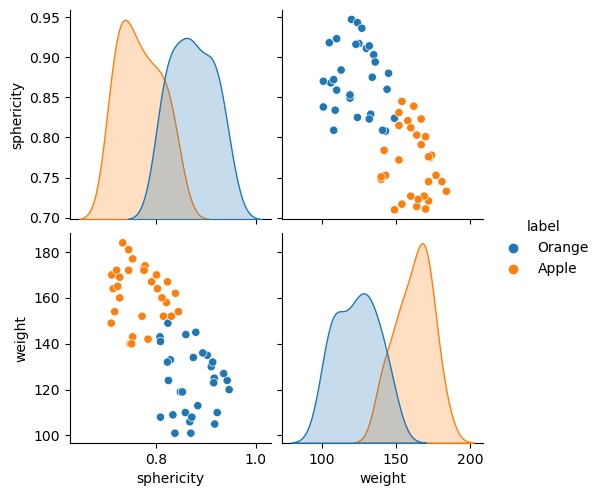

In [31]:
sns.pairplot(data=fruits, hue="label")
plt.show()

In [32]:
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


C:\Users\skong\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\skong\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\skong\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\skong\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

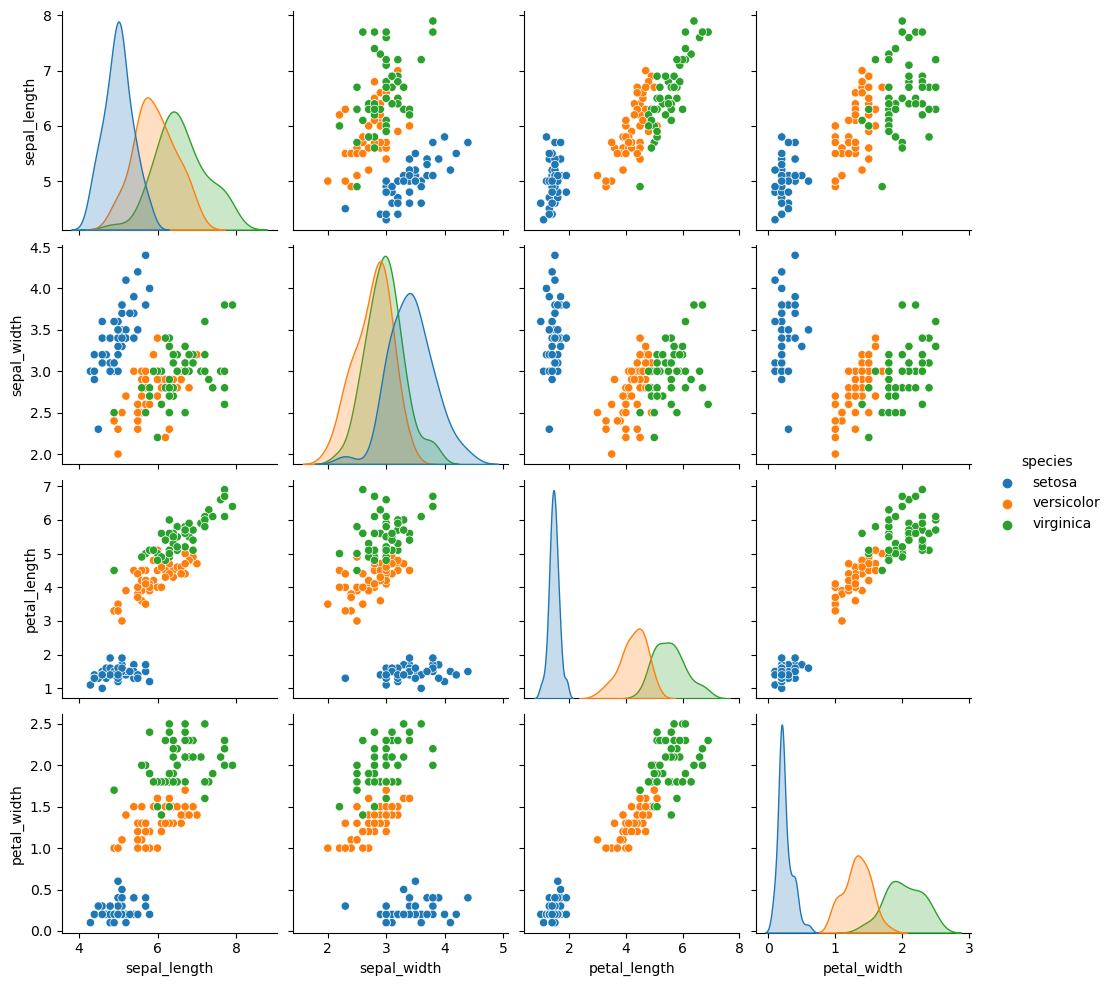

In [33]:
sns.pairplot(data=iris, hue="species")
plt.show()

In [34]:
iris.groupby("species").describe().transpose()

species                setosa  versicolor  virginica
sepal_length count  50.000000   50.000000  50.000000
             mean    5.006000    5.936000   6.588000
             std     0.352490    0.516171   0.635880
             min     4.300000    4.900000   4.900000
             25%     4.800000    5.600000   6.225000
             50%     5.000000    5.900000   6.500000
             75%     5.200000    6.300000   6.900000
             max     5.800000    7.000000   7.900000
sepal_width  count  50.000000   50.000000  50.000000
             mean    3.428000    2.770000   2.974000
             std     0.379064    0.313798   0.322497
             min     2.300000    2.000000   2.200000
             25%     3.200000    2.525000   2.800000
             50%     3.400000    2.800000   3.000000
             75%     3.675000    3.000000   3.175000
             max     4.400000    3.400000   3.800000
petal_length count  50.000000   50.000000  50.000000
             mean    1.462000    4.260000   5.552000
             std     0.173664    0.469911   0.551895
             min     1.000000    3.000000   4.500000
             25%     1.400000    4.000000   5.100000
             50%     1.500000    4.350000   5.550000
             75%     1.575000    4.600000   5.875000
             max     1.900000    5.100000   6.900000
petal_width  count  50.000000   50.000000  50.000000
             mean    0.246000    1.326000   2.026000
             std     0.105386    0.197753   0.274650
             min     0.100000    1.000000   1.400000
             25%     0.200000    1.200000   1.800000
             50%     0.200000    1.300000   2.000000
             75%     0.300000    1.500000   2.300000
             max     0.600000    1.800000   2.500000

In [68]:
X = iris[["petal_length", "petal_width"]]
y = iris["species"]

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=10)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((112, 2), (38, 2), (112,), (38,))

In [70]:
X_train.index, y_train.index

(Index([118, 141,  26,  43,  59,  41,  56,  32,  52,  70,
        ...
          0,  73,   8, 145, 123, 113,  64,  15, 125,   9],
       dtype='int64', length=112),
 Index([118, 141,  26,  43,  59,  41,  56,  32,  52,  70,
        ...
          0,  73,   8, 145, 123, 113,  64,  15, 125,   9],
       dtype='int64', length=112))

In [71]:
X_test.index, y_test.index

(Index([ 87, 111,  10,  91,  49,  60,  72,  67,  39,  55,  66, 142,  53,   1,
         19, 112,  85,  38,  21,  35, 102, 132, 126,  24,  61,   2,  95,  90,
         76, 117,  58,  97, 129, 114, 146,  47, 124, 120],
       dtype='int64'),
 Index([ 87, 111,  10,  91,  49,  60,  72,  67,  39,  55,  66, 142,  53,   1,
         19, 112,  85,  38,  21,  35, 102, 132, 126,  24,  61,   2,  95,  90,
         76, 117,  58,  97, 129, 114, 146,  47, 124, 120],
       dtype='int64'))

In [72]:
y_train.value_counts()

species
setosa        39
virginica     38
versicolor    35
Name: count, dtype: int64

In [73]:
y_test.value_counts()

species
versicolor    15
virginica     12
setosa        11
Name: count, dtype: int64

In [74]:
clf=DecisionTreeClassifier(criterion="entropy")
clf.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

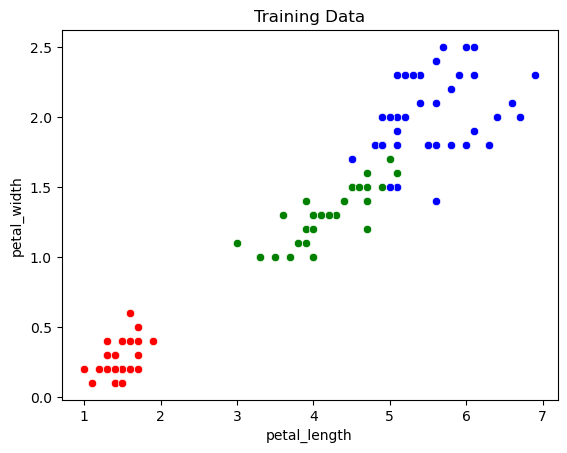

In [75]:
sns.scatterplot(data=X_train[y_train=="setosa"], x="petal_length", y="petal_width", c="red")
sns.scatterplot(data=X_train[y_train=="versicolor"], x="petal_length", y="petal_width", c="green") 
sns.scatterplot(data=X_train[y_train=="virginica"], x="petal_length", y="petal_width", c="blue")
plt.title("Training Data")
plt.xlabel("petal_length")
plt.ylabel("petal_width")
plt.show()

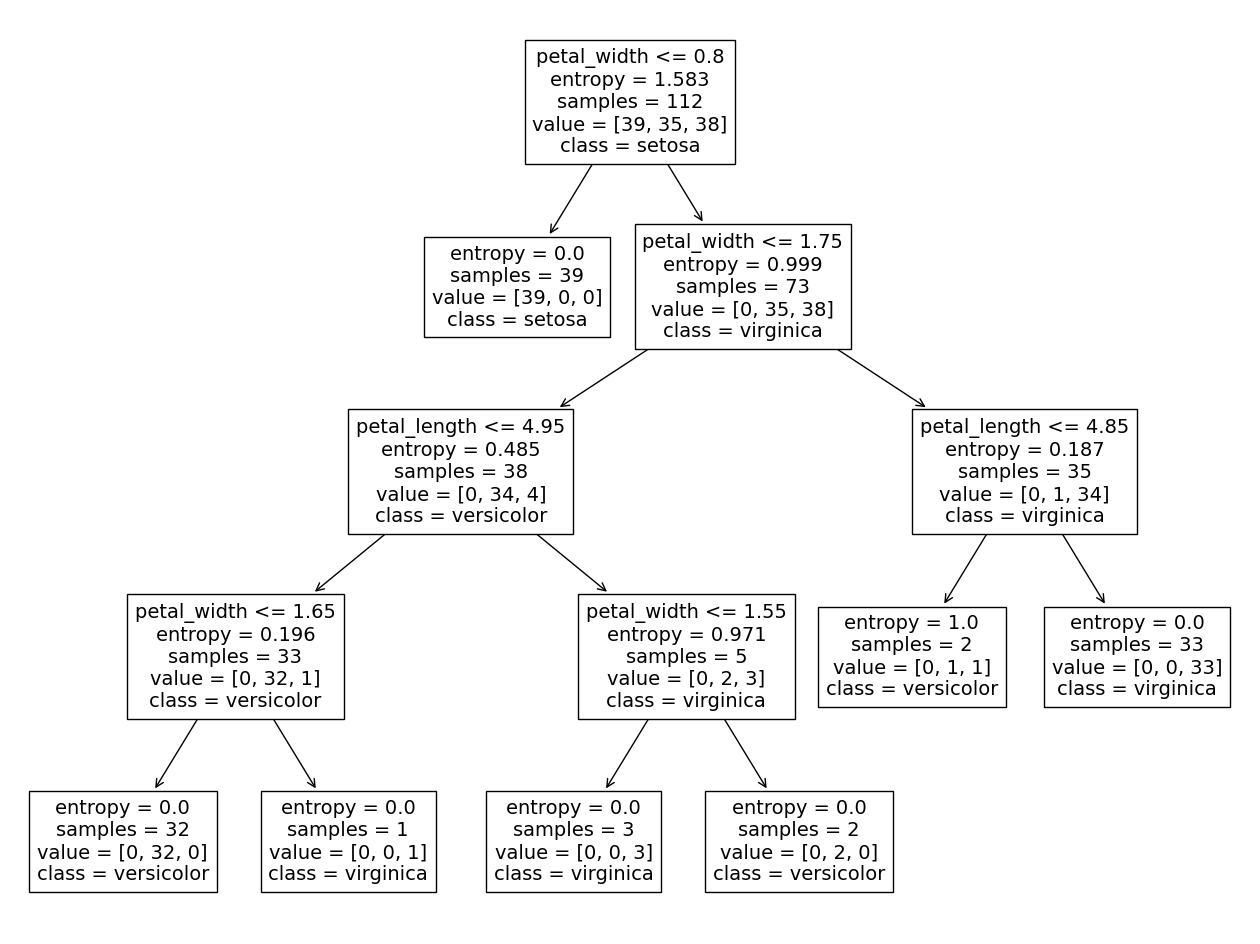

In [76]:
plt.figure(figsize=[16,12])
plot_tree(decision_tree=clf, feature_names=X_train.columns, class_names=["setosa", "versicolor", "virginica"])
plt.show()

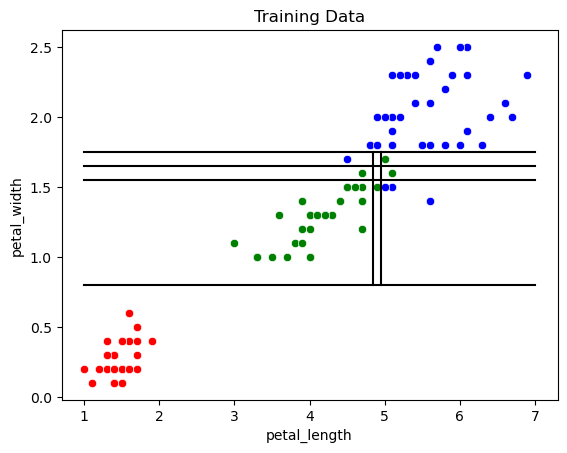

In [81]:
sns.scatterplot(data=X_train[y_train=="setosa"], x="petal_length", y="petal_width", c="red")
sns.scatterplot(data=X_train[y_train=="versicolor"], x="petal_length", y="petal_width", c="green")
sns.scatterplot(data=X_train[y_train=="virginica"], x="petal_length", y="petal_width", c="blue")
plt.plot([1,7],[0.8,0.8],c='black')
plt.plot([1,7],[1.75,1.75],c='black')
plt.plot([4.85,4.85],[0.8,1.75],c='black')
plt.plot([4.95,4.95],[0.8,1.75],c='black')
plt.plot([1,7],[1.55,1.55],c='black')
plt.plot([1,7],[1.65,1.65],c='black')
plt.title("Training Data")
plt.xlabel("petal_length")
plt.ylabel("petal_width")
plt.show()

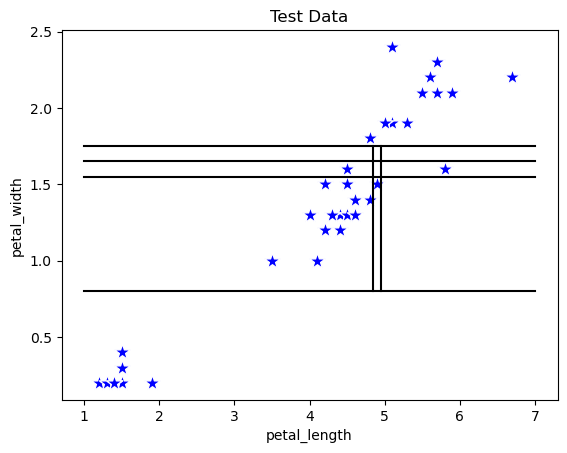

In [83]:
sns.scatterplot(data=X_test, x="petal_length", y="petal_width", marker='*',c='blue',s=150)
plt.title("Test Data")
plt.xlabel("petal_length")
plt.ylabel("petal_width")
plt.plot([1,7],[0.8,0.8],c='black')
plt.plot([1,7],[1.75,1.75],c='black')
plt.plot([4.85,4.85],[0.8,1.75],c='black')
plt.plot([4.95,4.95],[0.8,1.75],c='black')
plt.plot([1,7],[1.55,1.55],c='black')
plt.plot([1,7],[1.65,1.65],c='black')
# plt.text(3.5,2.3,"True Labels")
plt.show()

In [84]:
y_predict = clf.predict(X_test)
y_predict

array(['versicolor', 'virginica', 'setosa', 'versicolor', 'setosa',
       'versicolor', 'versicolor', 'versicolor', 'setosa', 'versicolor',
       'versicolor', 'virginica', 'versicolor', 'setosa', 'setosa',
       'virginica', 'versicolor', 'setosa', 'setosa', 'setosa',
       'virginica', 'virginica', 'versicolor', 'setosa', 'versicolor',
       'setosa', 'versicolor', 'versicolor', 'versicolor', 'virginica',
       'versicolor', 'versicolor', 'versicolor', 'virginica', 'virginica',
       'setosa', 'virginica', 'virginica'], dtype=object)

In [85]:
y_test.values

array(['versicolor', 'virginica', 'setosa', 'versicolor', 'setosa',
       'versicolor', 'versicolor', 'versicolor', 'setosa', 'versicolor',
       'versicolor', 'virginica', 'versicolor', 'setosa', 'setosa',
       'virginica', 'versicolor', 'setosa', 'setosa', 'setosa',
       'virginica', 'virginica', 'virginica', 'setosa', 'versicolor',
       'setosa', 'versicolor', 'versicolor', 'versicolor', 'virginica',
       'versicolor', 'versicolor', 'virginica', 'virginica', 'virginica',
       'setosa', 'virginica', 'virginica'], dtype=object)

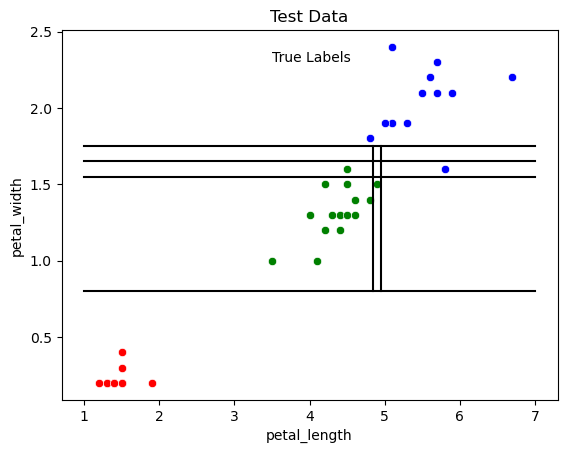

In [89]:
sns.scatterplot(data=X_test[y_test=="setosa"], x="petal_length", y="petal_width",c='red')
sns.scatterplot(data=X_test[y_test=="versicolor"], x="petal_length", y="petal_width",c='green')
sns.scatterplot(data=X_test[y_test=="virginica"], x="petal_length", y="petal_width",c='blue')
plt.plot([1,7],[0.8,0.8],c='black')
plt.plot([1,7],[1.75,1.75],c='black')
plt.plot([4.85,4.85],[0.8,1.75],c='black')
plt.plot([4.95,4.95],[0.8,1.75],c='black')
plt.plot([1,7],[1.55,1.55],c='black')
plt.plot([1,7],[1.65,1.65],c='black')
plt.title("Test Data")
plt.xlabel("petal_length")
plt.ylabel("petal_width")
plt.text(3.5,2.3,"True Labels")
plt.show()

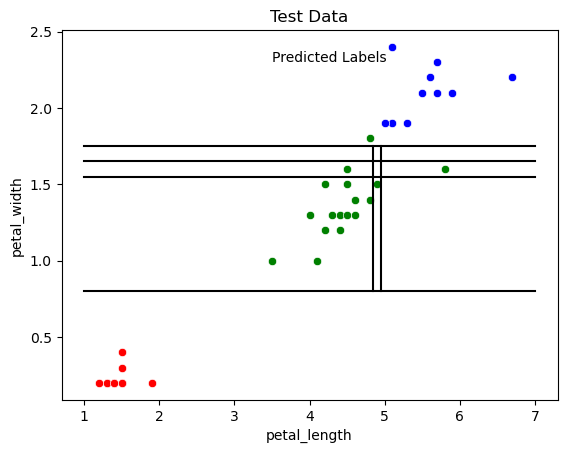

In [90]:
sns.scatterplot(data=X_test[y_predict=="setosa"], x="petal_length", y="petal_width",c='red')
sns.scatterplot(data=X_test[y_predict=="versicolor"], x="petal_length", y="petal_width",c='green')
sns.scatterplot(data=X_test[y_predict=="virginica"], x="petal_length", y="petal_width",c='blue')
plt.plot([1,7],[0.8,0.8],c='black')
plt.plot([1,7],[1.75,1.75],c='black')
plt.plot([4.85,4.85],[0.8,1.75],c='black')
plt.plot([4.95,4.95],[0.8,1.75],c='black')
plt.plot([1,7],[1.55,1.55],c='black')
plt.plot([1,7],[1.65,1.65],c='black')
plt.title("Test Data")
plt.xlabel("petal_length")
plt.ylabel("petal_width")
plt.text(3.5,2.3,"Predicted Labels")
plt.show()

In [91]:
accuracy_score(y_test, y_predict)

0.9473684210526315

In [92]:
y_predict!=y_test

87     False
111    False
10     False
91     False
49     False
60     False
72     False
67     False
39     False
55     False
66     False
142    False
53     False
1      False
19     False
112    False
85     False
38     False
21     False
35     False
102    False
132    False
126     True
24     False
61     False
2      False
95     False
90     False
76     False
117    False
58     False
97     False
129     True
114    False
146    False
47     False
124    False
120    False
Name: species, dtype: bool

In [93]:
y_test[y_predict!=y_test]

126    virginica
129    virginica
Name: species, dtype: object

In [94]:
y_predict[y_predict!=y_test]

array(['versicolor', 'versicolor'], dtype=object)

In [95]:
pd.DataFrame(confusion_matrix(y_test, y_predict), index=["setosa", "versicolor", "virginica"], columns=["setosa",  "versicolor", "virginica"])

,setosa,versicolor,virginica
setosa,11,0,0
versicolor,0,15,0
virginica,0,2,10


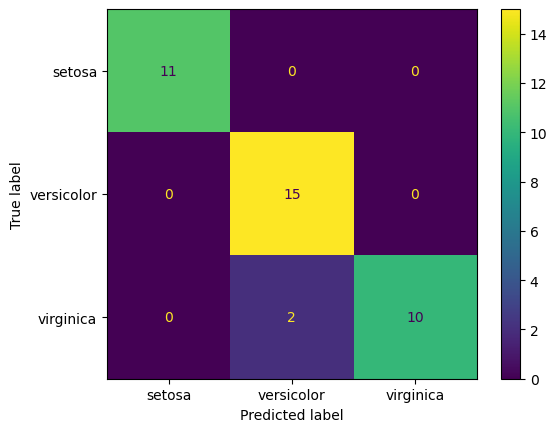

In [96]:
ConfusionMatrixDisplay.from_predictions(y_test, y_predict)
plt.show()

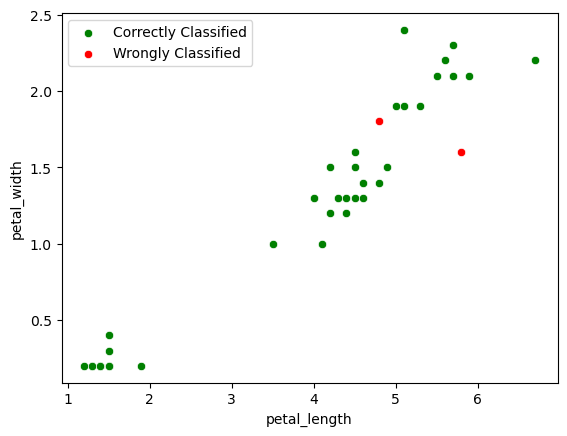

In [97]:
sns.scatterplot(data=X_test[y_predict==y_test], x="petal_length", y="petal_width", c='green', label="Correctly Classified")
sns.scatterplot(data=X_test[y_predict!=y_test], x="petal_length", y="petal_width", c='red', label="Wrongly Classified")
plt.xlabel("petal_length")
plt.ylabel("petal_width")
plt.legend()
plt.show()